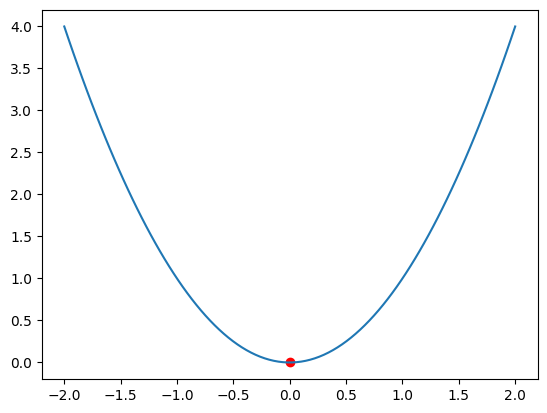

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y)
plt.scatter(0,0,color='red')

In [9]:
def min_gradient(x_start, rate, n_iter, f,g):
    # 初始化变量，x为起始点
    x = x_start
    # 开始迭代，最多进行n_iter次
    for n in range(n_iter):
        # 计算当前点的梯度，即函数在当前点的导数，可以算出斜率
        gx = g(x)
        # 计算当前点的函数值
        y = f(x)
        # 根据学习率和梯度更新x的值，
        x = x - rate*gx # 梯度下降
        # 打印当前迭代的信息
        print("X:{x:.2f}, Y:{y:.2f}, gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        # 如果梯度绝对值小于0.0001，认为已经收敛，提前结束迭代
        if abs(gx)<0.0001:
            break
    # 返回最终的x值
    return x

f = lambda x:x**2
g = lambda x: 2*x
min_gradient(x_start=2,rate=0.1, n_iter=10,f=f,g=g)

X:1.60, Y:4.00, gx:4.00
X:1.28, Y:2.56, gx:3.20
X:1.02, Y:1.64, gx:2.56
X:0.82, Y:1.05, gx:2.05
X:0.66, Y:0.67, gx:1.64
X:0.52, Y:0.43, gx:1.31
X:0.42, Y:0.27, gx:1.05
X:0.34, Y:0.18, gx:0.84
X:0.27, Y:0.11, gx:0.67
X:0.21, Y:0.07, gx:0.54


0.21474836480000006

In [10]:
min_gradient(x_start=2,rate=0.3, n_iter=10,f=f,g=g)

X:0.80, Y:4.00, gx:4.00
X:0.32, Y:0.64, gx:1.60
X:0.13, Y:0.10, gx:0.64
X:0.05, Y:0.02, gx:0.26
X:0.02, Y:0.00, gx:0.10
X:0.01, Y:0.00, gx:0.04
X:0.00, Y:0.00, gx:0.02
X:0.00, Y:0.00, gx:0.01
X:0.00, Y:0.00, gx:0.00
X:0.00, Y:0.00, gx:0.00


0.00020971520000000014

In [11]:
min_gradient(x_start=2,rate=1.1, n_iter=10,f=f,g=g)

X:-2.40, Y:4.00, gx:4.00
X:2.88, Y:5.76, gx:-4.80
X:-3.46, Y:8.29, gx:5.76
X:4.15, Y:11.94, gx:-6.91
X:-4.98, Y:17.20, gx:8.29
X:5.97, Y:24.77, gx:-9.95
X:-7.17, Y:35.66, gx:11.94
X:8.60, Y:51.36, gx:-14.33
X:-10.32, Y:73.95, gx:17.20
X:12.38, Y:106.49, gx:-20.64


12.383472844800014

In [12]:
import torch  
torch.__version__

'2.6.0+cpu'

In [13]:
x_tensor = torch.ones(5, 3,dtype=torch.float64)
print(x_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [14]:
import numpy as np
np.random.seed(1)
y_array= np.random.randn(5,3)
y_tensor = torch.from_numpy(y_array)
print(y_tensor)

tensor([[ 1.6243, -0.6118, -0.5282],
        [-1.0730,  0.8654, -2.3015],
        [ 1.7448, -0.7612,  0.3190],
        [-0.2494,  1.4621, -2.0601],
        [-0.3224, -0.3841,  1.1338]], dtype=torch.float64)


In [15]:
result = torch.add(x_tensor,y_tensor)
print(result)

tensor([[ 2.6243,  0.3882,  0.4718],
        [-0.0730,  1.8654, -1.3015],
        [ 2.7448,  0.2388,  1.3190],
        [ 0.7506,  2.4621, -1.0601],
        [ 0.6776,  0.6159,  2.1338]], dtype=torch.float64)


In [16]:
x_tensor.add_(y_tensor)
print(x_tensor)

tensor([[ 2.6243,  0.3882,  0.4718],
        [-0.0730,  1.8654, -1.3015],
        [ 2.7448,  0.2388,  1.3190],
        [ 0.7506,  2.4621, -1.0601],
        [ 0.6776,  0.6159,  2.1338]], dtype=torch.float64)


In [17]:
torch.manual_seed(1)
x_tensor = torch.randn(1, 4)
print(x_tensor)
y_tensor = torch.randn(4, 1)
print(y_tensor)

tensor([[0.6614, 0.2669, 0.0617, 0.6213]])
tensor([[-0.4519],
        [-0.1661],
        [-1.5228],
        [ 0.3817]])


In [18]:
torch.matmul(x_tensor,y_tensor)

tensor([[-0.2000]])

In [19]:
x_tensor[:,1]

tensor([0.2669])

In [20]:
z_tensor = x_tensor.view(-1, 8) 
z_tensor.shape

RuntimeError: shape '[-1, 8]' is invalid for input of size 4

In [21]:
z_tensor.tolist()
z_tensor.numpy()

NameError: name 'z_tensor' is not defined

In [23]:
x = torch.tensor(3.0, requires_grad=True) # 定义一个值为3的tensor名字叫作x
y = x*x   # 定义y和x的关系
y.backward()  # 自动计算梯度
print(x.grad) #打印y相对于x的梯度

tensor(6.)


In [24]:
z = x*x
z.backward()  
print(x.grad) 

tensor(12.)


In [25]:
x.grad.zero_()
z = x*x
z.backward()  
print(x.grad) 

tensor(6.)


In [26]:
def min_gred(x_start, rate, num, f):
    # 将初始值转换为PyTorch张量，并设置需要计算梯度
    x = torch.tensor(x_start, requires_grad=True)
    # 开始迭代，最多进行num次
    for n in range(num): 
        # 计算当前x对应的函数值
        y = f(x)
        # 自动计算梯度
        y.backward()   # 计算梯度
        # 获取当前梯度值并转换为Python列表
        gx = x.grad.tolist()  # 取出梯度
        # 根据学习率和梯度更新x的值
        newx = x.tolist() - rate*gx # 修正
        # 将更新后的值重新转换为PyTorch张量，并设置需要计算梯度
        x = torch.tensor(newx, requires_grad=True)  #重新定义x, 所以不需要清零操作
        # 打印当前迭代的信息
        print("X:{x:.2f}, Y:{y:.2f},gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        # 如果梯度绝对值小于0.0001，认为已经收敛，提前结束迭代
        if abs(gx)<0.0001:
            break
    # 返回最终的x值
    return x


In [27]:
f = lambda x:x**2
min_gred(2.0, 0.1, 10,f)

X:1.60, Y:4.00,gx:4.00
X:1.28, Y:2.56,gx:3.20
X:1.02, Y:1.64,gx:2.56
X:0.82, Y:1.05,gx:2.05
X:0.66, Y:0.67,gx:1.64
X:0.52, Y:0.43,gx:1.31
X:0.42, Y:0.27,gx:1.05
X:0.34, Y:0.18,gx:0.84
X:0.27, Y:0.11,gx:0.67
X:0.21, Y:0.07,gx:0.54


tensor(0.2147, requires_grad=True)

In [28]:
X = np.random.randint(1,10,[20,2])
y = 2*X[:,0] + 2*X[:,1]
y = y.reshape(20,1)

In [29]:
class NeuralNet_Simple:

    def __init__(self, dim,rate=0.1, n_iter=20):
        self.rate = rate  # 步长，学习速率
        self.n_iter = n_iter  # 迭代次数
        self.W = np.random.randn(1, dim)  # 代表被训练的系数
        self.MSE = []   # 用于保存损失的空list

    def fit(self, X, y):  # 训练函数
        for i in range(self.n_iter):
            output = self.predict(X)  # 计算预测的Y
            errors = y - output  
            g = np.dot(errors.T, X)
            self.W += self.rate * g  # 根据更新规则更新系数
            self.MSE.append((errors**2).sum())  # 记录损失函数的值
            #print(self.W)


    def predict(self, X):   # 给定系数和X计算预测的Y
        output = np.dot(X, self.W.T)
        return output


In [30]:
simple_nn = NeuralNet_Simple(dim = X.shape[1], rate=0.001, n_iter=30)
simple_nn.fit(X, y);  # 喂入数据进行训练

In [31]:
print(simple_nn.W)

[[1.99634945 2.00372808]]


In [32]:
simple_nn.MSE

[np.float64(15368.929119959024),
 np.float64(1479.6097345509363),
 np.float64(195.01271617740633),
 np.float64(60.731465471329194),
 np.float64(35.96332622174337),
 np.float64(24.80872469950572),
 np.float64(17.49441405288127),
 np.float64(12.371955124020007),
 np.float64(8.75259918179382),
 np.float64(6.192360448838486),
 np.float64(4.381048295164106),
 np.float64(3.0995610145066257),
 np.float64(2.19291794779831),
 np.float64(1.5514742779608692),
 np.float64(1.097657320702395),
 np.float64(0.7765849624829105),
 np.float64(0.5494284897447095),
 np.float64(0.3887168564004128),
 np.float64(0.275014487363213),
 np.float64(0.19457084768597196),
 np.float64(0.1376575289986064),
 np.float64(0.09739174966532545),
 np.float64(0.06890398928321081),
 np.float64(0.04874909584698737),
 np.float64(0.03448964814114135),
 np.float64(0.02440118751398621),
 np.float64(0.017263671396592982),
 np.float64(0.012213928109797883),
 np.float64(0.008641269660679135),
 np.float64(0.0061136385180354455)]

In [33]:
simple_nn.predict([3,4])

array([14.00396065])

In [34]:
X = np.random.randint(1,10,[20,2])
y_area = X[:,0]*X[:,1]
y_area = y_area.reshape(20,1)

In [35]:
simple_nn = NeuralNet_Simple(dim = X.shape[1], rate=0.001, n_iter=20)
simple_nn.fit(X, y);  # 喂入数据进行训练

In [36]:
simple_nn.MSE

[np.float64(28188.705572166116),
 np.float64(3893.5853695534493),
 np.float64(2855.541842043533),
 np.float64(2796.611634431257),
 np.float64(2783.160525489939),
 np.float64(2774.8180430558896),
 np.float64(2768.9598644171265),
 np.float64(2764.8135207965247),
 np.float64(2761.87741410713),
 np.float64(2759.7982421048473),
 np.float64(2758.3258966646817),
 np.float64(2757.283269454177),
 np.float64(2756.5449430556037),
 np.float64(2756.022104340556),
 np.float64(2755.6518611493493),
 np.float64(2755.389677005963),
 np.float64(2755.204013834631),
 np.float64(2755.072538251311),
 np.float64(2754.979435085587),
 np.float64(2754.91350497713)]

In [37]:
simple_nn.predict([3,4])

array([12.7099672])

In [38]:
import torch
import torch.nn as nn

In [39]:
# 定义超参数
input_size = 2
output_size = 1
n_iter = 30
learning_rate = 0.001

In [40]:
model = nn.Linear(input_size, output_size, bias=False)
# 定义损失函数和最优化方法
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [41]:
# 训练
for epoch in range(n_iter):
    # 数据转换
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y).to(torch.float)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))

Epoch [1/30], Loss: 500.5566
Epoch [2/30], Loss: 418.7619
Epoch [3/30], Loss: 355.4742
Epoch [4/30], Loss: 306.5039
Epoch [5/30], Loss: 268.6100
Epoch [6/30], Loss: 239.2852
Epoch [7/30], Loss: 216.5898
Epoch [8/30], Loss: 199.0231
Epoch [9/30], Loss: 185.4246
Epoch [10/30], Loss: 174.8960
Epoch [11/30], Loss: 166.7425
Epoch [12/30], Loss: 160.4268
Epoch [13/30], Loss: 155.5331
Epoch [14/30], Loss: 151.7396
Epoch [15/30], Loss: 148.7976
Epoch [16/30], Loss: 146.5144
Epoch [17/30], Loss: 144.7412
Epoch [18/30], Loss: 143.3627
Epoch [19/30], Loss: 142.2898
Epoch [20/30], Loss: 141.4535
Epoch [21/30], Loss: 140.8004
Epoch [22/30], Loss: 140.2892
Epoch [23/30], Loss: 139.8881
Epoch [24/30], Loss: 139.5722
Epoch [25/30], Loss: 139.3224
Epoch [26/30], Loss: 139.1240
Epoch [27/30], Loss: 138.9655
Epoch [28/30], Loss: 138.8380
Epoch [29/30], Loss: 138.7346
Epoch [30/30], Loss: 138.6500


In [42]:
model.weight

Parameter containing:
tensor([[1.6123, 1.8668]], requires_grad=True)

这段代码主要使用NumPy库生成随机数据并计算面积。让我逐行解释：

X = np.random.randint(1,10,[100,2])

使用NumPy的randint函数生成一个100行2列的二维数组
数组中的每个元素都是1到10之间的随机整数
可以理解为生成了100个矩形的长和宽
y_area = X[:,0]*X[:,1]

计算每个矩形的面积
X[:,0]获取所有行的第一列（长）
X[:,1]获取所有行的第二列（宽）
通过逐元素相乘得到面积
y_area= y_area.reshape(100,1)

将面积数组从一维（100,）重塑为二维（100,1）
这样每个面积值都是一个单独的数组元素，便于后续处理
总结：这段代码生成了100个随机矩形，计算了它们的面积，并将面积值整理成适合机器学习模型输入的格式。

In [43]:
X = np.random.randint(1,10,[100,2])
y_area = X[:,0]*X[:,1]
y_area= y_area.reshape(100,1)

这段代码定义了一个神经网络模型的超参数。让我逐行解释：

input_size = 2

输入层的大小为2，对应之前代码中每个矩形的长和宽两个特征
hidden_size = 50

隐藏层的大小为50，表示隐藏层有50个神经元
这是一个中等大小的隐藏层，适合处理相对简单的任务
output_size = 1

输出层的大小为1，因为我们只需要预测一个值（面积）
n_iter = 1000

训练迭代次数为1000次
这是一个相对较大的值，适合确保模型充分训练
learning_rate = 0.01

学习率为0.01
这是一个常用的初始学习率值，既不会太大导致训练不稳定，也不会太小导致训练过慢
这些超参数共同定义了神经网络的结构和训练过程，为后续的模型构建和训练做好准备。

In [44]:
import torch
import torch.nn as nn
#import torch.optim as optim
#import torch.nn.functional as F

# 定义超参数
input_size = 2
hidden_size = 50
output_size = 1
n_iter = 1000
learning_rate = 0.01

In [45]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # 调用父类构造函数
        super().__init__()
        # 定义第一层全连接层：输入层到隐藏层
        self.fc1 = nn.Linear(input_size, hidden_size) 
        # 定义激活函数为ReLU
        self.activate = nn.ReLU()
        # 定义第二层全连接层：隐藏层到输出层
        self.fc2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        # 通过第一层全连接层
        out = self.fc1(x)
        # 应用ReLU激活函数
        out = self.activate(out)
        # 通过第二层全连接层
        out = self.fc2(out)
        # 返回最终输出
        return out
   

In [46]:
# 初始化神经网络模型，这里使用的是一个简单的三层神经网络
# 参数 input_size: 输入层维度，hidden_size: 隐藏层维度，output_size: 输出层维度
model = NeuralNet(input_size, hidden_size, output_size)

# 定义损失函数，这里使用的是均方误差损失函数
criterion = nn.MSELoss()  

# 定义优化器，这里选择的是Adam优化器
# 参数 model.parameters(): 需要优化的模型参数，lr: 学习率
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [47]:
# 训练
for epoch in range(n_iter):
    # 数据转换
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y_area).to(torch.float)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))

Epoch [1/1000], Loss: 852.7946
Epoch [2/1000], Loss: 795.6735
Epoch [3/1000], Loss: 740.4216
Epoch [4/1000], Loss: 686.7975
Epoch [5/1000], Loss: 634.7451
Epoch [6/1000], Loss: 584.2558
Epoch [7/1000], Loss: 535.4365
Epoch [8/1000], Loss: 488.2063
Epoch [9/1000], Loss: 442.8104
Epoch [10/1000], Loss: 399.3736
Epoch [11/1000], Loss: 358.2023
Epoch [12/1000], Loss: 319.5795
Epoch [13/1000], Loss: 283.6925
Epoch [14/1000], Loss: 251.1169
Epoch [15/1000], Loss: 222.2209
Epoch [16/1000], Loss: 197.1601
Epoch [17/1000], Loss: 176.4167
Epoch [18/1000], Loss: 160.1949
Epoch [19/1000], Loss: 148.5327
Epoch [20/1000], Loss: 141.4561
Epoch [21/1000], Loss: 138.5866
Epoch [22/1000], Loss: 139.2707
Epoch [23/1000], Loss: 142.6090
Epoch [24/1000], Loss: 147.5088
Epoch [25/1000], Loss: 152.8077
Epoch [26/1000], Loss: 157.4312
Epoch [27/1000], Loss: 160.5874
Epoch [28/1000], Loss: 161.8476
Epoch [29/1000], Loss: 161.1242
Epoch [30/1000], Loss: 158.6176
Epoch [31/1000], Loss: 154.7286
Epoch [32/1000], 

In [48]:
model(torch.Tensor([4,6]))

tensor([23.4122], grad_fn=<ViewBackward0>)

In [2]:
import pandas as pd 
columns_name = ['x'+str(i) for i in range(9)]+['y']
tic_data = pd.read_csv('tic_record.txt',names = columns_name)

In [3]:
tic_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,-1,0,0,0,4
2,0,0,0,0,-1,1,0,0,0,2
3,0,0,-1,0,1,-1,0,0,0,8
4,0,0,1,0,-1,1,0,0,-1,0


选中的代码是从一个名为 tic_data 的 DataFrame 中提取特征矩阵 X 和目标向量 y。具体解释如下：

X = tic_data.iloc[:,:9].values:

iloc[:,:9] 表示选取 DataFrame 的所有行和前 9 列（索引从 0 开始）
.values 将选取的数据转换为 NumPy 数组
这行代码的作用是将前 9 列数据作为特征矩阵 X
y = tic_data.iloc[:,9].values:

iloc[:,9] 表示选取 DataFrame 的所有行和第 10 列（索引为 9）
.values 将选取的数据转换为 NumPy 数组
这行代码的作用是将第 10 列数据作为目标向量 y
总结：这段代码通常用于机器学习任务中，将数据集分为特征矩阵 X 和目标变量 y，其中 X 包含前 9 列特征，y 包含第 10 列的目标值。

In [4]:
X = tic_data.iloc[:,:9].values
y = tic_data.iloc[:,9].values

In [5]:
# 定义超参数
input_size = 9        # 输入层神经元数量，对应特征数量
hidden_size = 20      # 隐藏层神经元数量
output_size = 9       # 输出层神经元数量，对应分类类别数
n_iter = 1000         # 训练迭代次数
learning_rate = 0.01  # 学习率，控制参数更新步长


In [8]:
import torch
import torch.nn as nn
import os

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()  # 调用父类nn.Module的初始化方法
        self.fc1 = nn.Linear(input_size, hidden_size)  # 定义输入层到隐藏层的全连接层
        self.activate = nn.ReLU()  # 定义ReLU激活函数
        self.fc2 = nn.Linear(hidden_size, output_size)  # 定义隐藏层到输出层的全连接层

    
    def forward(self, x):
        out = self.fc1(x)  # 输入数据通过第一层全连接层
        out = self.activate(out)  # 应用ReLU激活函数
        out = self.fc2(out)  # 通过第二层全连接层
        return out  # 返回最终输出

    
    def save(self, file_name='model.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)

In [10]:
model = NeuralNet(input_size, hidden_size, output_size)  # 初始化神经网络模型
criterion = nn.CrossEntropyLoss()  # 定义交叉熵损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # 使用Adam优化器
  

In [11]:
# 训练
for epoch in range(n_iter):
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y).to(torch.long)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 验证效果
    if (epoch>0 and epoch%50==0):
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))
        with torch.no_grad():
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == targets).sum().item()
            total = targets.size(0)
        print('Accuracy of the network : {} %'.format(100 * correct / total))

Epoch [51/1000], Loss: 1.4286
Accuracy of the network : 53.264685232857474 %
Epoch [101/1000], Loss: 1.0437
Accuracy of the network : 65.24689913409783 %
Epoch [151/1000], Loss: 0.8821
Accuracy of the network : 68.92113269365785 %
Epoch [201/1000], Loss: 0.7988
Accuracy of the network : 70.11467353147671 %
Epoch [251/1000], Loss: 0.7561
Accuracy of the network : 70.69974256962321 %
Epoch [301/1000], Loss: 0.7347
Accuracy of the network : 71.09758951556283 %
Epoch [351/1000], Loss: 0.7192
Accuracy of the network : 71.54224198455418 %
Epoch [401/1000], Loss: 0.7066
Accuracy of the network : 72.10390826117482 %
Epoch [451/1000], Loss: 0.6942
Accuracy of the network : 72.45494968406273 %
Epoch [501/1000], Loss: 0.6825
Accuracy of the network : 72.85279663000235 %
Epoch [551/1000], Loss: 0.6741
Accuracy of the network : 73.2272408144161 %
Epoch [601/1000], Loss: 0.6674
Accuracy of the network : 73.43786566814885 %
Epoch [651/1000], Loss: 0.6626
Accuracy of the network : 73.4612684296747 %
E

In [13]:
import numpy as np
import matplotlib.pyplot as plt

currentBoard = np.array([[0,0,0,0,0,0,0,0,0]])
input = torch.from_numpy(currentBoard).to(torch.float)
output = model(input)
_, predicted = torch.max(output, 1)
print(predicted)

tensor([4])
